# Overview 
[source](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

## Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
<hr />

<h2>Table of Content:</h2>

### 1. Import Libraries and Data 
    1.1 Top 5 rows of data
    1.2 Last 5 rows of data
    1.3 Some Random Values from our data 
    1.4 Feature overview
    
### 2. Imputations <br />

    2.1 Check For Null/Missing values<br>
    2.2 Check For Outliers<br>
    
### 3. Exploratory data analysis <br />
    
### 4. Modeling<br />

<hr />    
<hr />

# Let's Start !
# 1. Import Libraries and Data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
data = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

### 1.1 Top 5 rows of data 

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 1.2 Last 5 rows of data

In [4]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### 1.3 Some Random Values from our data

In [5]:
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
634,10,92,62,0,0,25.9,0.167,31,0
765,5,121,72,23,112,26.2,0.245,30,0
446,1,100,72,12,70,25.3,0.658,28,0
29,5,117,92,0,0,34.1,0.337,38,0
569,0,121,66,30,165,34.3,0.203,33,1


### 1.4 Feature overview

In [6]:
data.shape,data.size

((768, 9), 6912)

    So our data have 768 rows and 9 columns, with a total size of 6912 cells in it.

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


    From above we can see that none of our column in object or text. (only int and float)
    
    We can compute and visualize this data easily.

# 2. Imputations

### 2.1 Check For Null/Missing values

In [9]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

    So we do not have any null/missing value. Wow, thats great, now lets check for some outliers.

### 2.2 Searching for Outliers.

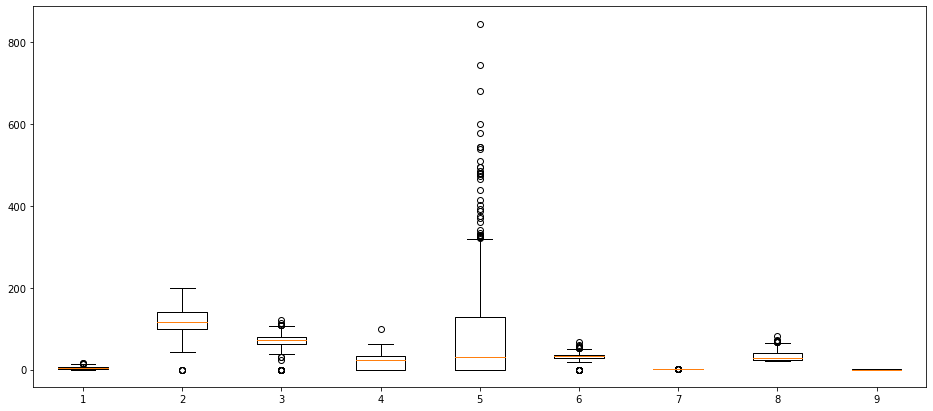

In [10]:
fig,ax=plt.subplots(1,1,figsize=(16,7))
ax.boxplot(data)
plt.show()

     So we have some outliers in column 5 i.e BMI column.
     Come let's fix this.

In [11]:
data['BMI'].max(),data['BMI'].min(),data['BMI'].mean(),data['BMI'].mode()

(67.1,
 0.0,
 31.992578124999977,
 0    32.0
 dtype: float64)

     I will be using Interquartile range method for pointing out the outliers, 
     as in this we choose all the data between 15% and 85% rest data we can drop.

In [12]:
# First quartile (Q1) 
Q1 = np.percentile(data['BMI'], 15, interpolation = 'midpoint') 
  
# Third quartile (Q3) 
Q3 = np.percentile(data['BMI'], 85, interpolation = 'midpoint') 
  
# Interquaritle range (IQR) 
IQR = Q3 - Q1 
print("Q1 = ",Q1)
print("Q3 = ",Q3)
print(IQR) 

Q1 =  24.85
Q3 =  39.25
14.399999999999999


In [13]:
(data['BMI']>Q3).sum(),(data['BMI']<Q1).sum()

(116, 116)

    Here we can see that we have alot data left from these quaritile values.(204 and we can not ignore such large data)
    
    So I manually checked for the outliers and got that we have most outliers after 99% of data,
    means only 1% data contains outliers so lets drop them.  

In [14]:
np.percentile(data['BMI'], 98.5, interpolation = 'midpoint') 

49.05

In [15]:
val = data['BMI'].sort_values(ascending=False)

     These are the top values which I am counting as outliers. 

In [16]:
print(val[:8])

177    67.1
445    59.4
673    57.3
125    55.0
120    53.2
303    52.9
247    52.3
193    52.3
Name: BMI, dtype: float64


In [17]:
data = data[(data['BMI']>50)==False]

In [18]:
data.shape

(760, 9)

    So after removing outliers we are left with 760 rows. 
    
    Lets check removal of Outliers by plotting a boxplot.

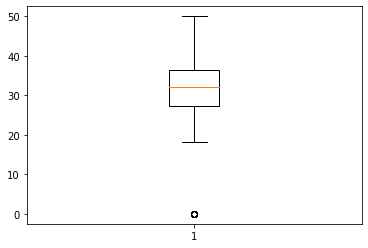

In [19]:
plt.boxplot(data['BMI'])
plt.show()

    So we have our outliars removed and also we are clear from missing data. 
    
    It's time for some visualizations. 
<hr />

# 3. Exploratory data analysis

#### Firstly lets check that if our data is balanced or not.
**Balanced data** : If there are two classes, then balanced data would mean 50% points for each of the class.)
#### Then we will plot a Distribution plot and other visualizations.

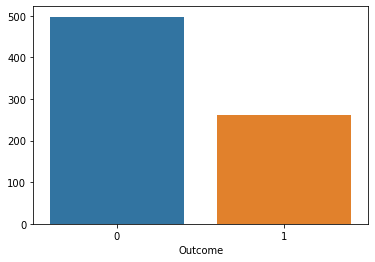

In [20]:
xs = data['Outcome'].value_counts().index
ys = data['Outcome'].value_counts().values

ax = sns.barplot(xs, ys)
ax.set_xlabel("Outcome")
plt.show()


Our Data is clearly not balanced. We will balance this data using **SMOTE technique** after some visualizations.

**SMOTE** is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the **overfitting problem posed by random oversampling**. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.
<hr />

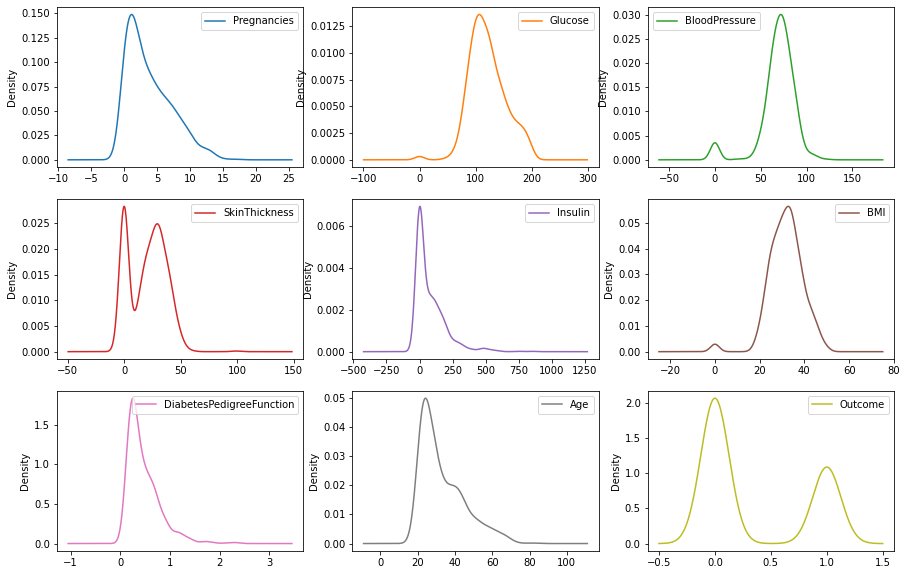

In [21]:
data.plot(kind= 'kde' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,10))
plt.show()

We have our maximim columns normally distributed

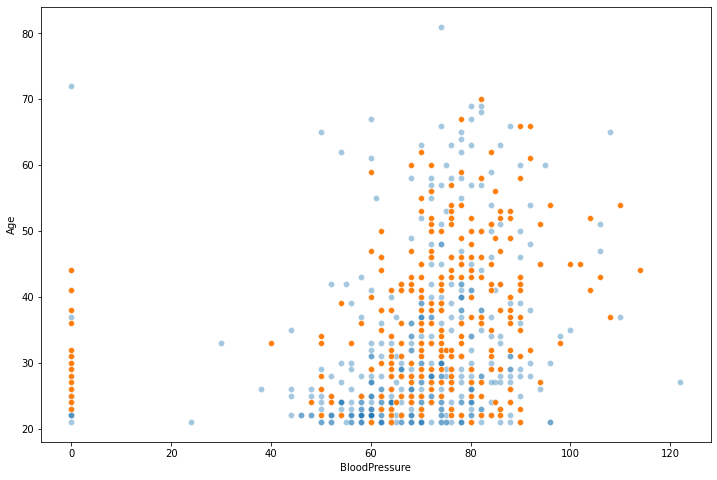

In [22]:
# Age vs BloodPressure with hue = Outcome
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x="BloodPressure", y="Age", alpha=0.4, data=data[data['Outcome'] == 0])
sns.scatterplot(x="BloodPressure", y="Age", alpha=1, data=data[data['Outcome'] == 1], ax=ax)
plt.show()

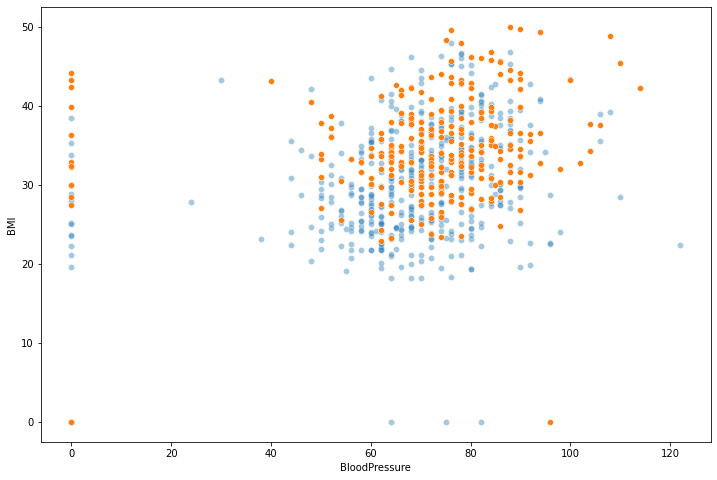

In [23]:
# BloodPressure vs BMI with hue = Outcome
plt.figure(figsize=(12,8))
ax = sns.scatterplot(y="BMI", x="BloodPressure", alpha=0.4, data=data[data['Outcome'] == 0])
sns.scatterplot(y="BMI", x="BloodPressure", alpha=1, data=data[data['Outcome'] == 1], ax=ax)
plt.show()

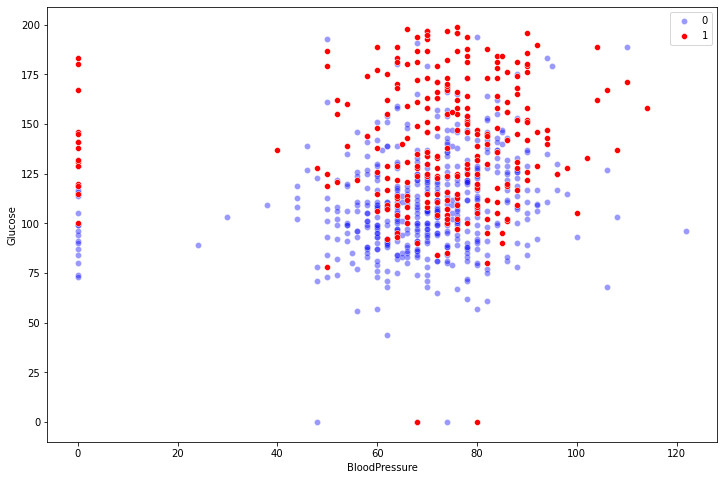

In [24]:
# BloodPressure vs BMI with hue = Outcome
plt.figure(figsize=(12,8))
ax = sns.scatterplot(y="Glucose", x="BloodPressure", alpha=0.4, color="blue", label="0", data=data[data['Outcome'] == 0])
sns.scatterplot(x="BloodPressure", y="Glucose", alpha=1, color="red", label="1", data=data[data['Outcome'] == 1], ax=ax)
plt.show()

## Insights
<hr>
<h4> - A younger person with high blood pressure level have more chances of getting diabetic positive than a elder person with high blood pressure
<br><br>
- An average person with BMI more than 35 have more chances of getting diabetic positive inspite of having a normal blood pressure also.
<br><br>
- A person with high glucose level and high blood pressure have more chances of getting diabetic positive.
<br><br>
- A person with high glucose level and high BMI can also come diabetic positive.
</h4>

<hr />
Now let's apply SMOTE for balancing our data.

Balancing data is important for better modeling results.
<hr />

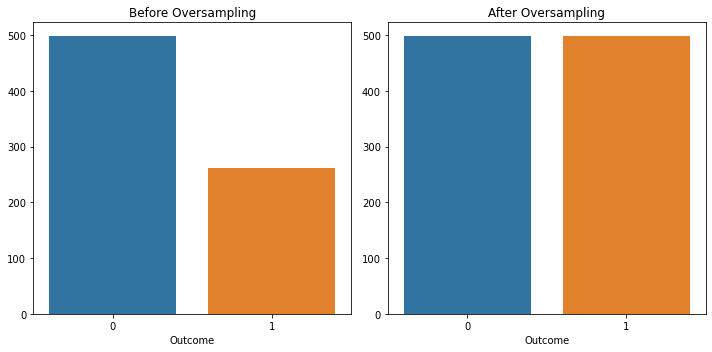

In [25]:
# Splitting into features and value to be predicted
X = data.drop(columns=['Outcome'])
y = data['Outcome']
fig, ax = plt.subplots(1,2 ,figsize = (10,5))

sns.barplot(x=['0', '1'], y =[sum(y == 0), sum(y == 1)], ax = ax[0])
ax[0].set_title("Before Oversampling")
ax[0].set_xlabel('Outcome')

#Using SMOTE to balance the Data
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2) 
X, y = sm.fit_resample(X, y) 

sns.barplot(x=['0', '1'], y =[sum(y == 0), sum(y == 1)], ax = ax[1])
ax[1].set_title("After Oversampling")
ax[1].set_xlabel('Outcome')

plt.tight_layout()
plt.show()

# 4. Modeling 

Let's first split the data into X,y using sklearn functions

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((697, 8), (299, 8), (697,), (299,))

We will use the cross validation technique for testing different models on our data.


<h4>What is Cross-validation?</h4>
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. 
The procedure has k number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation.(k is the only parameter given)

LR: 0.816455 (0.071655)
LDA: 0.822475 (0.070178)
RF: 0.817495 (0.075402)
KNN: 0.816485 (0.080621)
DT: 0.818434 (0.066108)
NB: 0.810434 (0.071669)
SVM: 0.816465 (0.068806)


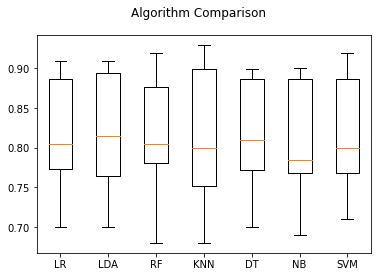

In [27]:
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())
    pipeline.fit(X_train, y_train)
    cv_results = model_selection.cross_val_score(pipeline, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Here I am using RandomForest Classifier as base and for described modeling.

I am using the **pipeline** feature to make a pipeline for standardising and then only applying proper algorithm. 
<hr />


In [28]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())
pipeline.fit(X_train, y_train)
prediction = pipeline.predict(X_test)

print(f"Accuracy Score : {round(accuracy_score(y_test, prediction) * 100, 2)}%")

Accuracy Score : 81.61%


Wow, we got accuracy score above 80%. Thats great.

Now let's check for the model report.

In [29]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       152
           1       0.79      0.84      0.82       147

    accuracy                           0.82       299
   macro avg       0.82      0.82      0.82       299
weighted avg       0.82      0.82      0.82       299



# Thanks for your time :)

## If you like this kernel an Upvote would be appreciated.